# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [7]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


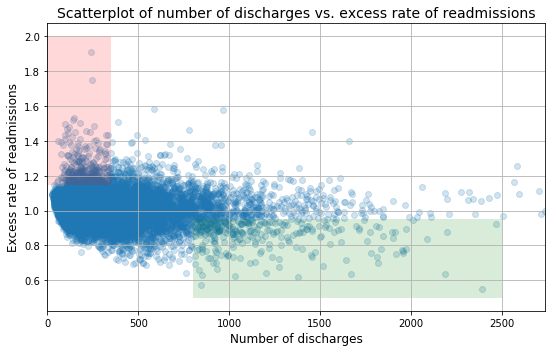

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. There does indeed seem to be a general negative trend in term of larger hospitals (with more discharges) to have a lower rate of excess readmissions. However, there seem to be a number of outliers of smallers hospitals, which could effect the mean excess readmission rate for such institutions. Also, there appear to be a number of larger institutions (>2000 dircharges) that all have >1.0 excess rate of readmission.
### It is also important to check whether there is a correaltion between the hospital size and the predicted readmission rate as if there is a positive correlation than what we are seeing might not tell the whole story.

In [29]:
# Test:
# Ho: The larger and smaller hospitals have the same excess rate of readmission on average, while holding 
# all else constant.


clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 1]
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] >= 0]

larger = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 500]
smaller = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 500]
print(larger['Excess Readmission Ratio'].mean())
print(smaller['Excess Readmission Ratio'].mean())
print(larger['Excess Readmission Ratio'].median())
print(smaller['Excess Readmission Ratio'].median())
print(np.std(larger['Excess Readmission Ratio']))
print(np.std(smaller['Excess Readmission Ratio']))

print('The difference in means between the two groups is:', smaller['Excess Readmission Ratio'].mean() -  \
larger['Excess Readmission Ratio'].mean())

0.9951773527161439
1.01113108184172
0.99655
1.0049
0.10724269828218355
0.08661970888277817
The difference in means between the two groups is: 0.015953729125576133


In [24]:
# assumption of a negative correlation doesnt seem to be correct. Slopr close to zero.
# slope shows about a .03 perentage point decrease in the Excess Readmission Ratio for every 1000 discharges.
# This is much lower than the difference that was reported by comapring two specific sub-groups.

slope, intercept = np.polyfit(clean_hospital_read_df['Number of Discharges'], \
                              clean_hospital_read_df['Excess Readmission Ratio'], 1)
print(slope, intercept)

-2.9010517330565266e-05 1.0181061473733535


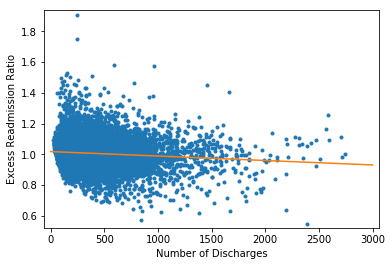

In [25]:
# visualizing the slope - it is negative but very slight.

c = np.array([0,3000])
i = slope * c + intercept

# Plot the illiteracy rate versus fertility
_ = plt.plot(x,y , marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Excess Readmission Ratio')


# Add regression line to your plot
_ = plt.plot(c, i)

# Show the plot
plt.show()


In [26]:
print(np.mean(smaller['Excess Readmission Ratio'])-np.mean(larger['Excess Readmission Ratio']))

0.043754121965489


In [30]:
# two sampel t-test to see if there is a significant firrefence betwen the two groups.
# the p value of 5.9e-15 shows that there is indeed a significant difference 

from scipy import stats
stats.ttest_ind(smaller['Excess Readmission Ratio'], larger['Excess Readmission Ratio'])

Ttest_indResult(statistic=7.816560687683829, pvalue=5.9015630815000946e-15)

### with a p-value of 5.9e-15 we can indeed report the difference in the two groups with a statistical significance of alpha of 0.01.

### While there is a statistical significant difference between the mean of the two groups (those with less than 500 discharges or more than 500), there might not be a practical significance as the difference might not be large enough to make the costs associated with the transformation of hospital facilities be worth it in terms of the opportunity costs of such costs. 
### As seen above, a .03% decrease for every 1000 discharges for an institution might be practically very low.

### The gap in the ECDF below shows a clear difference between the two groups. Such a difference becomes even more stark when comparing groups such as <=100 discharges and >=1000 discharges.

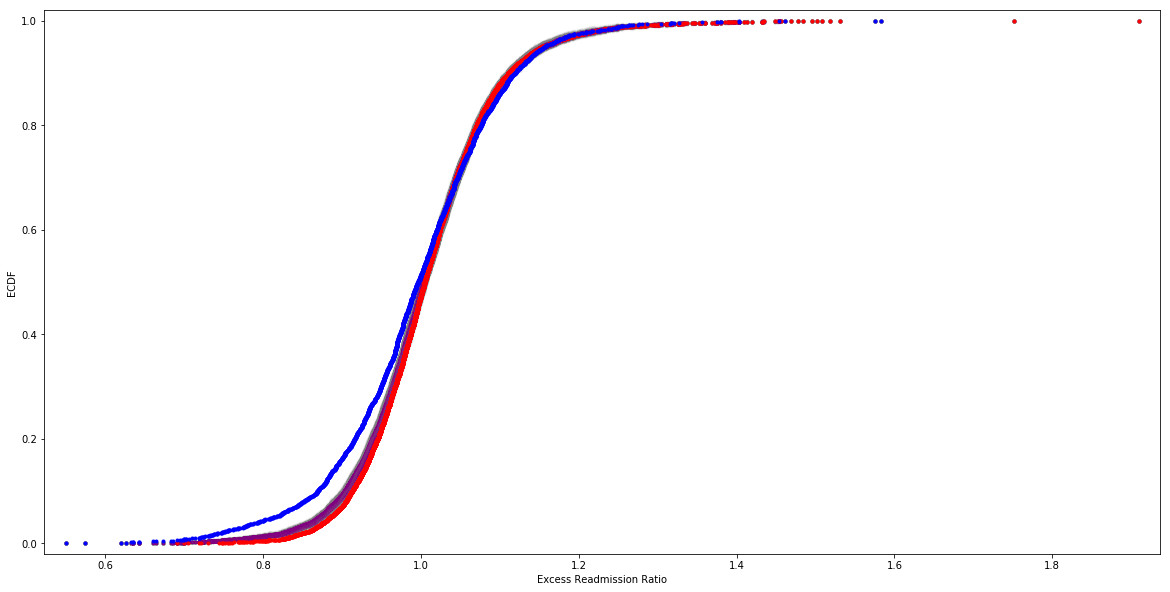

In [31]:
# plotting the ECDFs of the smaller and larger institutions in terms of their Excess Readmission rates
# We see something close to a normal distribution for both. Note the gap between the two groups for values 
# under 1.0 of the excess rates. The distribution seems to be nearly identical for values above 1.0 though.

# The permutation samples tended to follow the distribution that we saw in the samller institutions.

plt.figure(figsize=(20,10))

for i in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(smaller['Excess Readmission Ratio'], larger['Excess Readmission Ratio'])

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='purple', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='gray', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(smaller['Excess Readmission Ratio'])
x_2, y_2 = ecdf(larger['Excess Readmission Ratio'])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('ECDF')
plt.show()